### Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write up, download this file as a PDF or HTML file and submit in the next section.


**(1) What is the independent variable? What is the dependent variable?**

*Independent variable:*
The variable being manipulated is the word color congruency. i.e. Whether or not the word denoting the color matches with the color of the font. For example, if "green" was written in green font then it would be *congruent*, if any other color is used then it will be denoted as *incongruent*.

*Dependent variables:*
The time taken for participants to complete the congruent and incongruent tests.

**(2) What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.**

**Null Hypothesis ( $H_{0}:\mu_{1}=\mu_{2}$)**
* $H_{0}$:The average population of time it takes to name the ink colors in equally-sized lists for two groups(  congruent and incongruent) are equal.

**Alternative Hypothesis ( $H_{0}:\mu_{1}\ne\mu_{2}$)**
* $H_{1}$ : The average population of time it takes to name the ink colors in equally-sized lists for two groups(  congruent and incongruent) are not equal.

Statistical Test : dependent t-test (two tailed)
Justification : 
* We need to compare the means of two related groups to determine the statistically significant difference between two means.
* We are assuming normal distribution
* There are less than 30 samples
* it has to be two tailed because our hypothesis is testing equality of two means. 

**(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.**

In [3]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy
from scipy import stats
%matplotlib inline

dframe = pd.read_csv('stroopdata.csv')    # read csv file and save to dframe variable
print(dframe.head())   # print csv data (only some part just to be sure)
dframe['difference'] = dframe['Incongruent'] - dframe['Congruent']
dframe.describe()  # Describe shows a quick statistic summary of your data like mean, Q1, Q3, median, etc

   Congruent  Incongruent
0     12.079       19.278
1     16.791       18.741
2      9.564       21.214
3      8.630       15.687
4     14.669       22.803


,Congruent,Incongruent,difference
count,24.000000,24.000000,24.000000
mean,14.051125,22.015917,7.964792
std,3.559358,4.797057,4.864827
min,8.630000,15.687000,1.950000
25%,11.895250,18.716750,3.645500
50%,14.356500,21.017500,7.666500
75%,16.200750,24.051500,10.258500
max,22.328000,35.255000,21.919000


** Central Tendency **
* congruent mean ($\bar{x}_C) = 14.0511$
* incongruent mean ($\bar{x}_I)= 22.0159$

** Measure of Variability **
* congruent standard deviation ($s_C) = 3.5594$
* incongruent standard deviation ($s_I) = 4.7971$

**(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.**

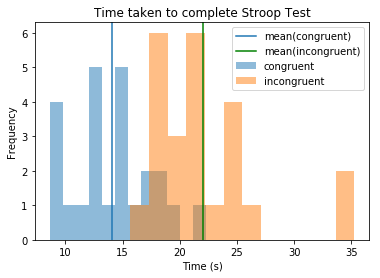

In [4]:
# Visualisation 1
plt.hist(x=dframe["Congruent"], label="congruent",alpha=0.5, bins=12)
plt.hist(x=dframe["Incongruent"], label="incongruent",alpha=0.5, bins=12)
plt.title("Time taken to complete Stroop Test")
plt.ylabel("Frequency")
plt.xlabel("Time (s)")
plt.axvline(14.1, label="mean(congruent)", )
plt.axvline(22.0, label="mean(incongruent)", color="green")
plt.legend();

In [5]:
dframe[dframe["Incongruent"] > 30]   # Number of outliers

,Congruent,Incongruent,difference
14,18.200,35.255,17.055
19,12.369,34.288,21.919


It seems that there are a couple of outliers who took more than 30secs to complete the incongruent tests.
This will skew the mean of the right. The histogram does not make a very convincing bell-curve, which suggests that the sample size could probably be bigger.
It seems that generally, people take much longer to complete the incongruent test.

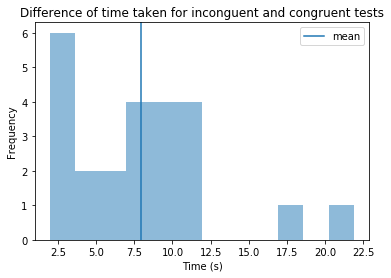

In [6]:
# Visualisation 2
plt.hist(x=dframe["difference"], alpha=0.5, bins=12)
plt.title("Difference of time taken for inconguent and congruent tests")
plt.ylabel("Frequency")
plt.xlabel("Time (s)")
plt.axvline(7.96, label="mean")
plt.legend();

Most people seem to take roughly 7.5 seconds longer on the incongruent test then on the congruent test.
Though, there are a couple outliers who take much longer on the former than the latter.
Most people probably take a second to learn not to look at the word but at the color, 6 people seem to be paticularly good at this!

**(5) Now, perform the statistical test and report the results. What is the confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?**

In [7]:
degreesOfFreedom = 23
stats.t.ppf(0.975, degreesOfFreedom)

# Calculates the T-test on TWO RELATED samples of scores, a and b.
t_stat, p_value = stats.ttest_rel(a=dframe['Incongruent'],b=dframe['Congruent'])
t_stat, p_value    #print values

(8.020706944109957, 4.1030005857111781e-08)

In [8]:
# Confidence
H0_rejection_confidence = 1-p_value
H0_rejection_confidence

0.99999995896999416

With a p_value of roughly 4.10e-8, we can reject the null hypothesis with at least 99% confidence. Thus, we can conclude that incongruent group and congruent group has different average population time to complete tasks.

## Reference
* [About pandas dataframes](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html)
* [About pandas visualization](http://pandas.pydata.org/pandas-docs/stable/visualization.html#visualization)
* [scipy stats](https://docs.scipy.org/doc/scipy/reference/tutorial/stats.html)
* [Latex Symbols](http://reu.dimacs.rutgers.edu/Symbols.pdf)
* [Dependent T-Test](https://statistics.laerd.com/statistical-guides/dependent-t-test-statistical-guide-2.php)
* [Determining Sample Size](https://www.qualtrics.com/blog/determining-sample-size/)
* [About the null and alternative hypothesis](http://support.minitab.com/en-us/minitab/17/topic-library/basic-statistics-and-graphs/hypothesis-tests/basics/null-and-alternative-hypotheses/)
* [Which chart or graph is right for you?](https://www.tableau.com/sites/default/files/media/which_chart_v6_final_0.pdf)